In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as OLS
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

pd.__version__

'2.2.3'

# Часть 3 - Моделирование данных

## Содержание

### 9 Моделирование данных - предварительная обработка
- Введение в моделирование данных
- Изучение зависимых и независимых переменных
- Понимание масштабирования и нормализации данных
- Задание 9.1 - Разбиение, масштабирование и моделирование данных
- Резюме

### 10 Моделирование данных - основы моделирования
- Введение в моделирование данных
- Изучение основ моделирования
- Прогнозирование будущих значений временных рядов
- Задание 10.1 - Нормализация и сглаживание данных
- Резюме

### 11 Моделирование данных - Регрессионное моделирование
- Введение в регрессионное моделирование
- Изучение регрессионного моделирования
- Диагностика модели
- Задание 11.1 - Множественная регрессия с нелинейными моделями
- Резюме

## 9 Моделирование данных - предварительная обработка

### Введение в моделирование данных

In [29]:
df = pd.read_csv('../../data/part3/chapter9/metal_alloy.csv')
df

,metal_1,metal_2,alloy_hardness
0,0.958000,0.140659,1.254157
1,0.920147,0.107089,0.956846
2,0.590646,0.483316,1.952517
3,0.787427,0.239446,1.636522
4,0.223974,0.817454,2.367797
...,...,...,...
2853,0.548989,0.536676,1.964153
2854,0.506765,0.520222,2.121921
2855,0.519789,0.553591,1.802263
2856,0.499100,0.539305,1.687534


In [30]:
df.describe()

,metal_1,metal_2,alloy_hardness
count,2858.000000,2858.000000,2858.000000
mean,0.571507,0.511146,1.863682
std,0.092015,0.094267,0.315855
min,0.148309,0.097655,0.558923
25%,0.520719,0.461251,1.661194
50%,0.568061,0.513548,1.864663
75%,0.618368,0.565723,2.076587
max,1.021651,0.922628,3.363747


<Axes: >

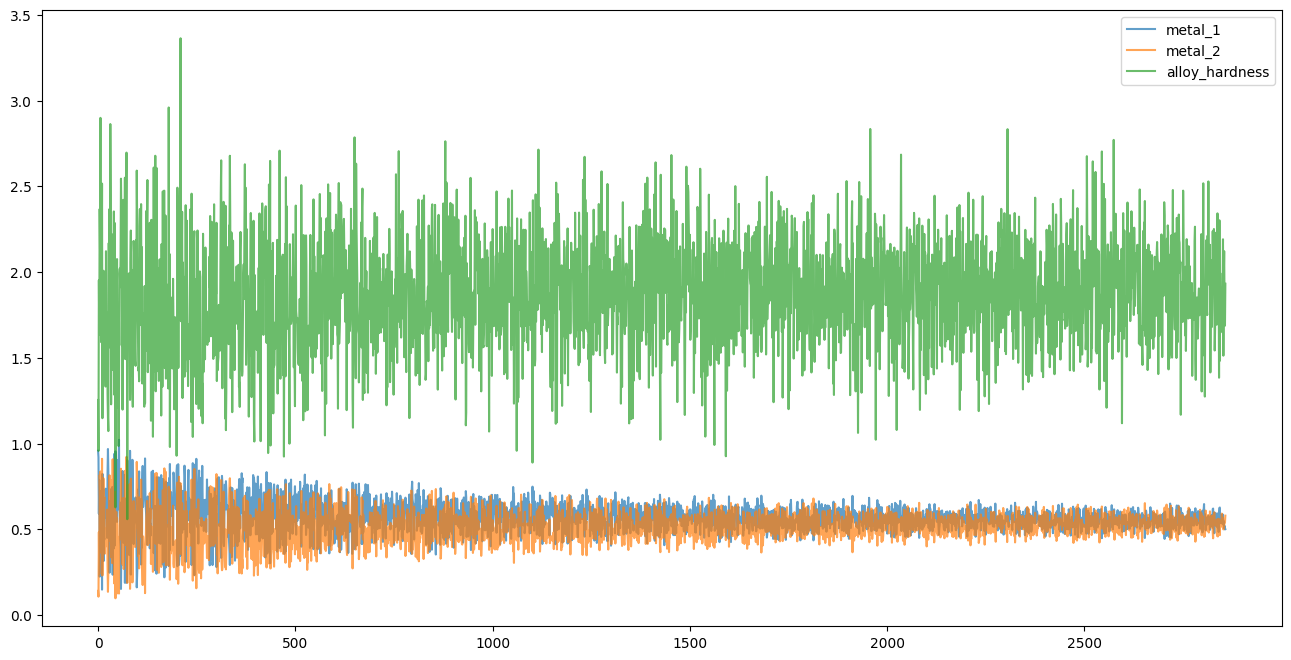

In [31]:
df.plot(figsize=(16, 8), alpha=0.7)

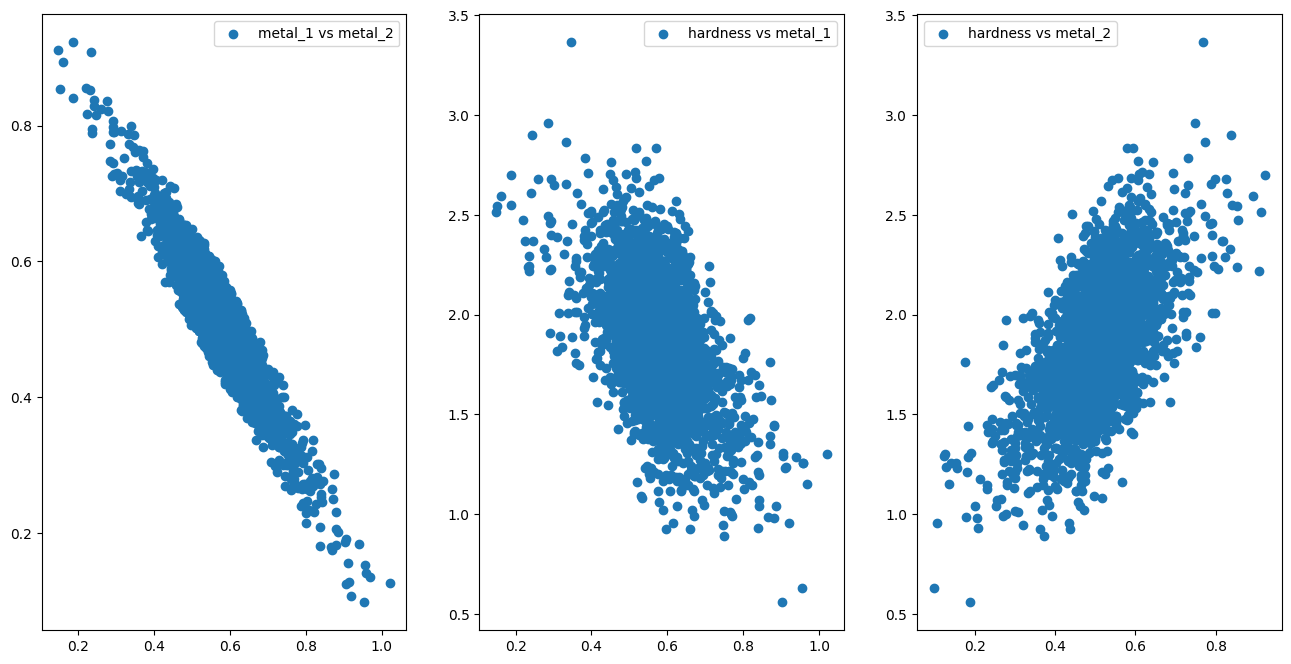

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].scatter(
    df['metal_1'],
    df['metal_2'],
    label = 'metal_1 vs metal_2',
)
axes[0].legend()

axes[1].scatter(
    df['metal_1'],
    df['alloy_hardness'],
    label = 'hardness vs metal_1',
)
axes[1].legend()

axes[2].scatter(
    df['metal_2'],
    df['alloy_hardness'],
    label = 'hardness vs metal_2',
)
axes[2].legend()

plt.show()

In [33]:
correlation = df['metal_1'].corr(df['metal_2'])
correlation

np.float64(-0.9335045017430931)

#### Статистическая модель

In [34]:
import statsmodels.api as sm

X = sm.add_constant(df.loc[:, ['metal_1', 'metal_2']])
lin_model = sm.OLS(df['alloy_hardness'], X)
my_model = lin_model.fit()

print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:         alloy_hardness   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     929.6
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          1.23e-311
Time:                        12:19:01   Log-Likelihood:                -44.409
No. Observations:                2858   AIC:                             94.82
Df Residuals:                    2855   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3434      0.147     -2.339      0.0

y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2

In [35]:
metal_1 = 0.4
metal_2 = 0.8

In [36]:
y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2
y

2.5626800000000003

#### Генерация случайных данных

In [37]:
np.random.seed(55)

multi_coll_data = pd.DataFrame({'x1': range(1000)})

for i in range(9):
    multi_coll_data['x' + str(i + 2)] = np.add(list(range(1000)), np.random.uniform(-50, 50, 1000))
    

for i in range(0, 9, 2):
    multi_coll_data['x' + str(i + 2)] = np.add(multi_coll_data['x' + str(i + 2)], 10 * np.random.uniform(-100, 100, 1000))
    

np.random.normal(-100, 100, 1000)
multi_coll_data['y'] = range(1000)

In [38]:
multi_coll_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0,-579.086269,-21.352788,-127.136661,-44.242123,-82.658981,23.043307,390.611985,32.379823,855.245946,0
1,1,352.288310,42.355440,975.854620,-40.891040,-333.674322,-0.717224,-201.265706,-12.522834,-494.399577,1
2,2,460.677297,0.467680,-691.299930,-35.042297,293.510696,28.223616,516.710800,50.632223,-638.390063,2
3,3,-746.577859,-40.318827,357.783231,-19.421430,704.798484,30.728551,-3.113581,-46.230721,-741.969272,3
4,4,-692.088919,17.724324,-953.864448,22.520236,-707.770416,1.901699,469.345834,0.762547,807.144628,4
...,...,...,...,...,...,...,...,...,...,...,...
995,995,1861.276790,1013.560643,1087.982225,1023.738733,980.756591,949.343224,760.496127,945.706977,1281.693691,995
996,996,1387.077341,1019.701253,1332.705610,1027.438780,1941.506839,989.956534,23.911601,982.981131,1064.590884,996
997,997,1171.140963,991.916710,1357.697060,1046.720219,1828.655199,949.730361,284.580213,985.958475,1691.377234,997
998,998,214.549942,995.550479,1603.694783,1000.771433,316.011067,1003.760028,1196.998620,1047.695951,173.344662,998


In [39]:
multi_coll_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,488.511416,501.155173,528.081494,498.461929,514.890713,498.892323,461.384521,499.442777,506.567117,499.500000
std,288.819436,652.089943,290.159283,638.220208,289.768393,653.657528,289.952784,643.473473,290.528559,657.127397,288.819436
min,0.000000,-930.320259,-40.318827,-1006.390645,-44.242123,-970.074483,-43.303588,-888.712598,-46.230721,-959.722293,0.000000
25%,249.750000,-12.600960,253.698322,41.185114,254.758918,12.409287,250.807414,-31.118217,246.944195,-2.936601,249.750000
50%,499.500000,481.873691,496.696353,545.518091,502.306019,534.582109,506.972797,455.911348,499.169859,508.460055,499.500000
75%,749.250000,991.083324,757.958709,991.522760,752.583341,1027.528486,746.531261,962.945517,746.464865,1028.102798,749.250000
max,999.000000,1978.357550,1021.453170,1986.100582,1046.720219,1941.506839,1039.565397,1984.087235,1047.695951,1980.877205,999.000000


<Axes: >

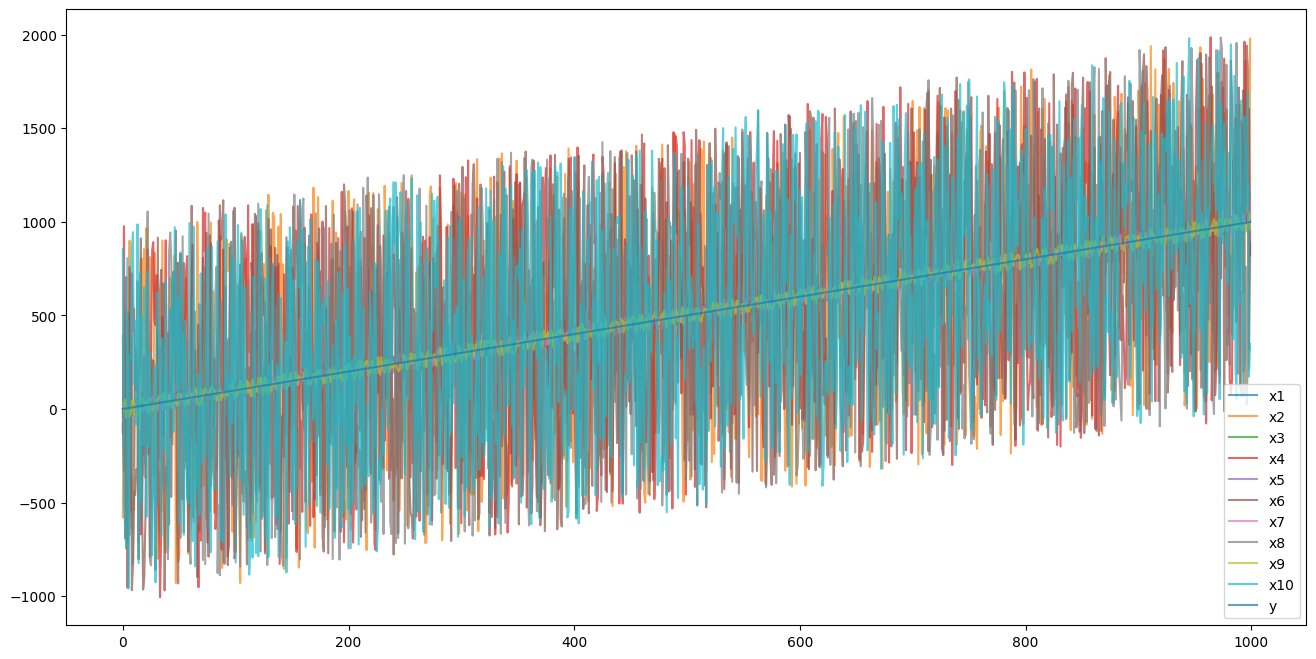

In [40]:
multi_coll_data.plot(figsize=(16, 8), alpha=0.7)

<Axes: >

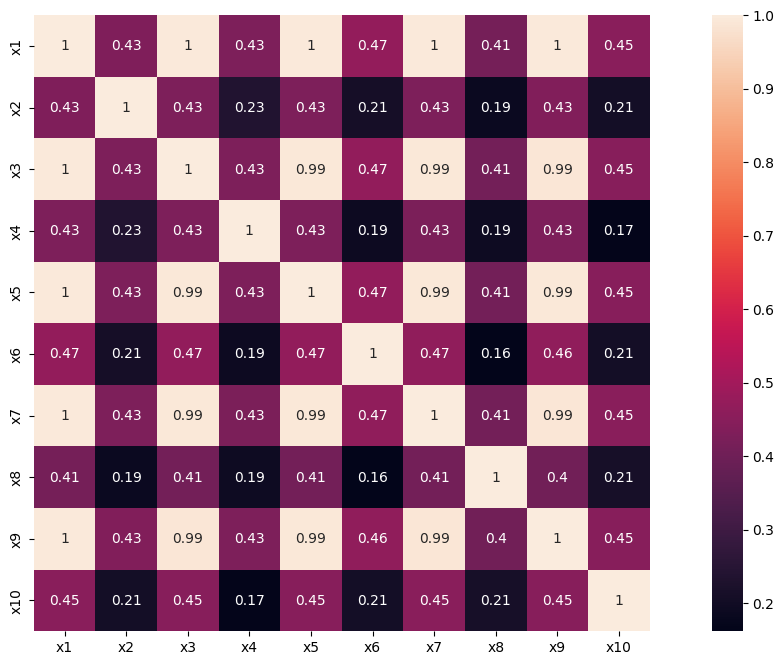

In [41]:
import seaborn as sns

corr = multi_coll_data.drop(columns = ['y']).corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, square=True, annot=True)

In [ ]:
plt.figure(figsize=(16, 8))
sns.pairplot(multi_coll_data.drop(columns = ['y']))


KeyboardInterrupt: 

<Figure size 1600x800 with 0 Axes>

### Изучение зависимых и независимых переменных

In [ ]:
df = pd.read_csv('../../data/part3/chapter9/auto-mpg.data.csv')
df

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [ ]:
df.describe()

,mpg,cyl,disp,hp,weight,accel,my
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
train = df.loc[:310]
train

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
306,33.5,4,151.0,90,2556,13.2,79,pontiac phoenix
307,41.5,4,98.0,76,2144,14.7,80,vw rabbit
308,38.1,4,89.0,60,1968,18.8,80,toyota corolla tercel
309,32.1,4,98.0,70,2120,15.5,80,chevrolet chevette


In [ ]:
valid = df.loc[311:350]
valid.head()

,mpg,cyl,disp,hp,weight,accel,my,name
311,28.0,4,151.0,90,2678,16.5,80,chevrolet citation
312,26.4,4,140.0,88,2870,18.1,80,ford fairmont
313,24.3,4,151.0,90,3003,20.1,80,amc concord
314,19.1,6,225.0,90,3381,18.7,80,dodge aspen
315,34.3,4,97.0,78,2188,15.8,80,audi 4000


In [ ]:
test = df.loc[350:]
test.head()

,mpg,cyl,disp,hp,weight,accel,my,name
350,33.7,4,107.0,75,2210,14.4,81,honda prelude
351,32.4,4,108.0,75,2350,16.8,81,toyota corolla
352,32.9,4,119.0,100,2615,14.8,81,datsun 200sx
353,31.6,4,120.0,74,2635,18.3,81,mazda 626
354,28.1,4,141.0,80,3230,20.4,81,peugeot 505s turbo diesel


#### Разделение данных на обучающую, валидационную и тестовую выборку

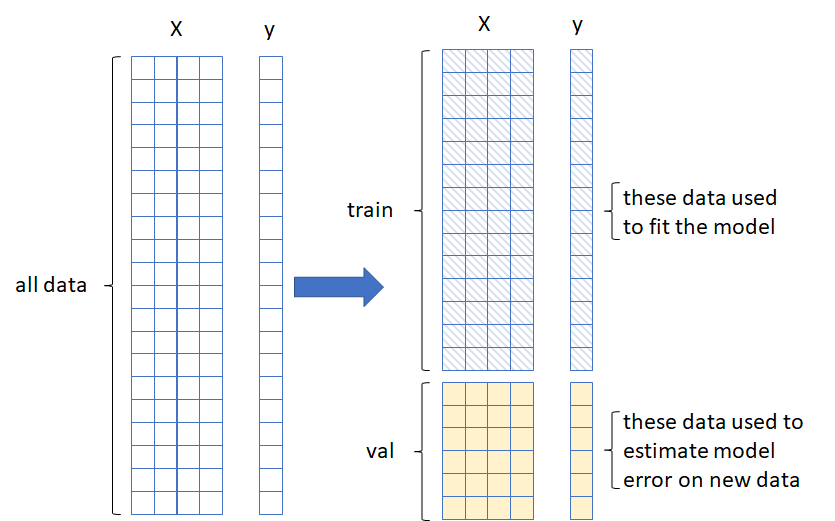

In [ ]:
df

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [ ]:
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)

        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins

        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)

    fig.tight_layout()
    plt.show()

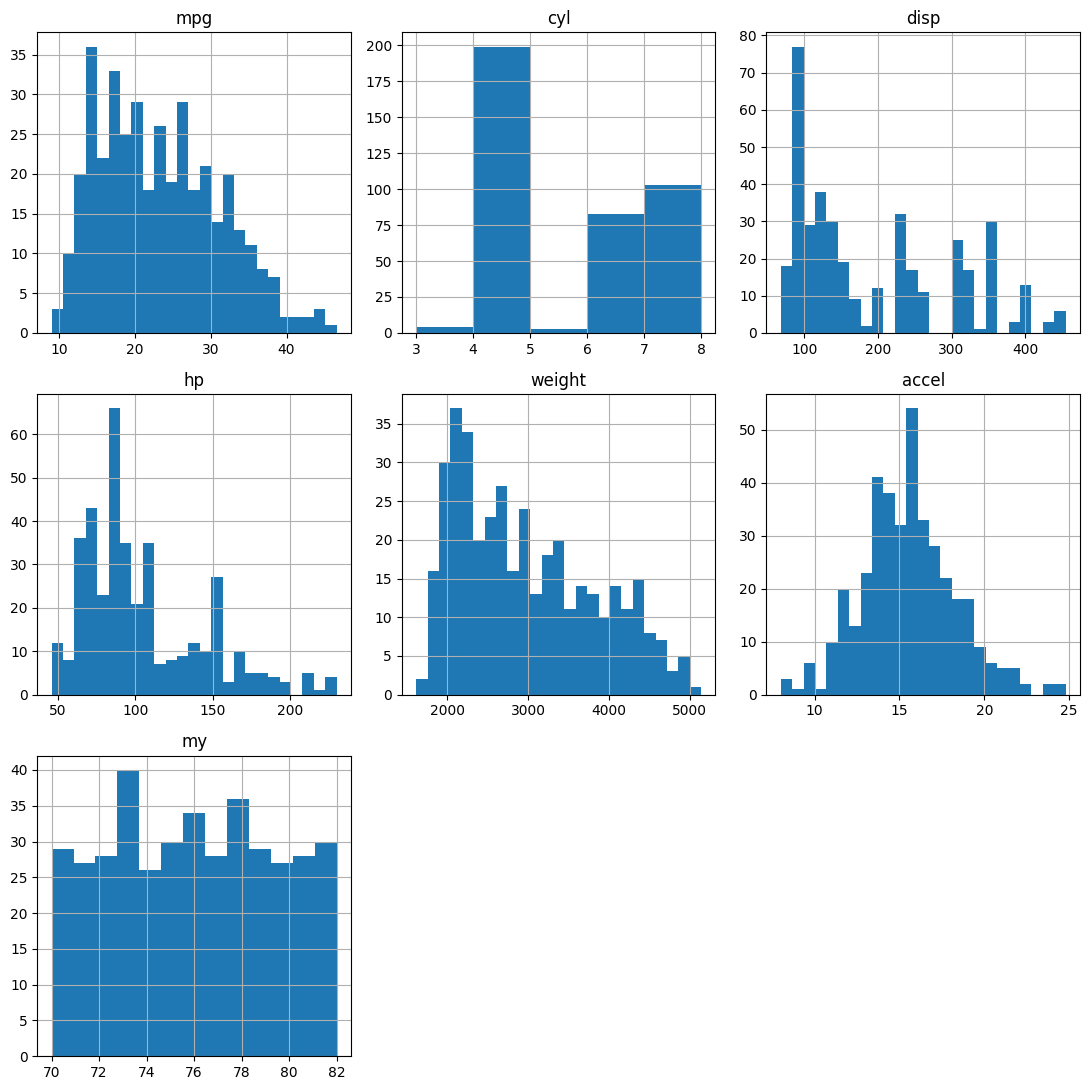

In [ ]:
plot_histogram_grid(df, variables=list(df.columns[:-1]), n_rows=3, n_cols=3, bins=25)

In [ ]:
def plot_corr_grid(df, variables):
    n_cols = len(variables) - 1
    n_rows = n_cols
    fig = plt.figure(figsize = (18, 16))
    for i in range(n_rows):
        for j in range(i):
            ax = fig.add_subplot(n_rows, n_cols, (i) * n_cols + j + 1) 
            df.plot.scatter(ax = ax, x = variables[i], y = variables[j])
            ax.set_title(variables[i] + ' vs. ' + variables[j])

    fig.tight_layout()
    plt.show()

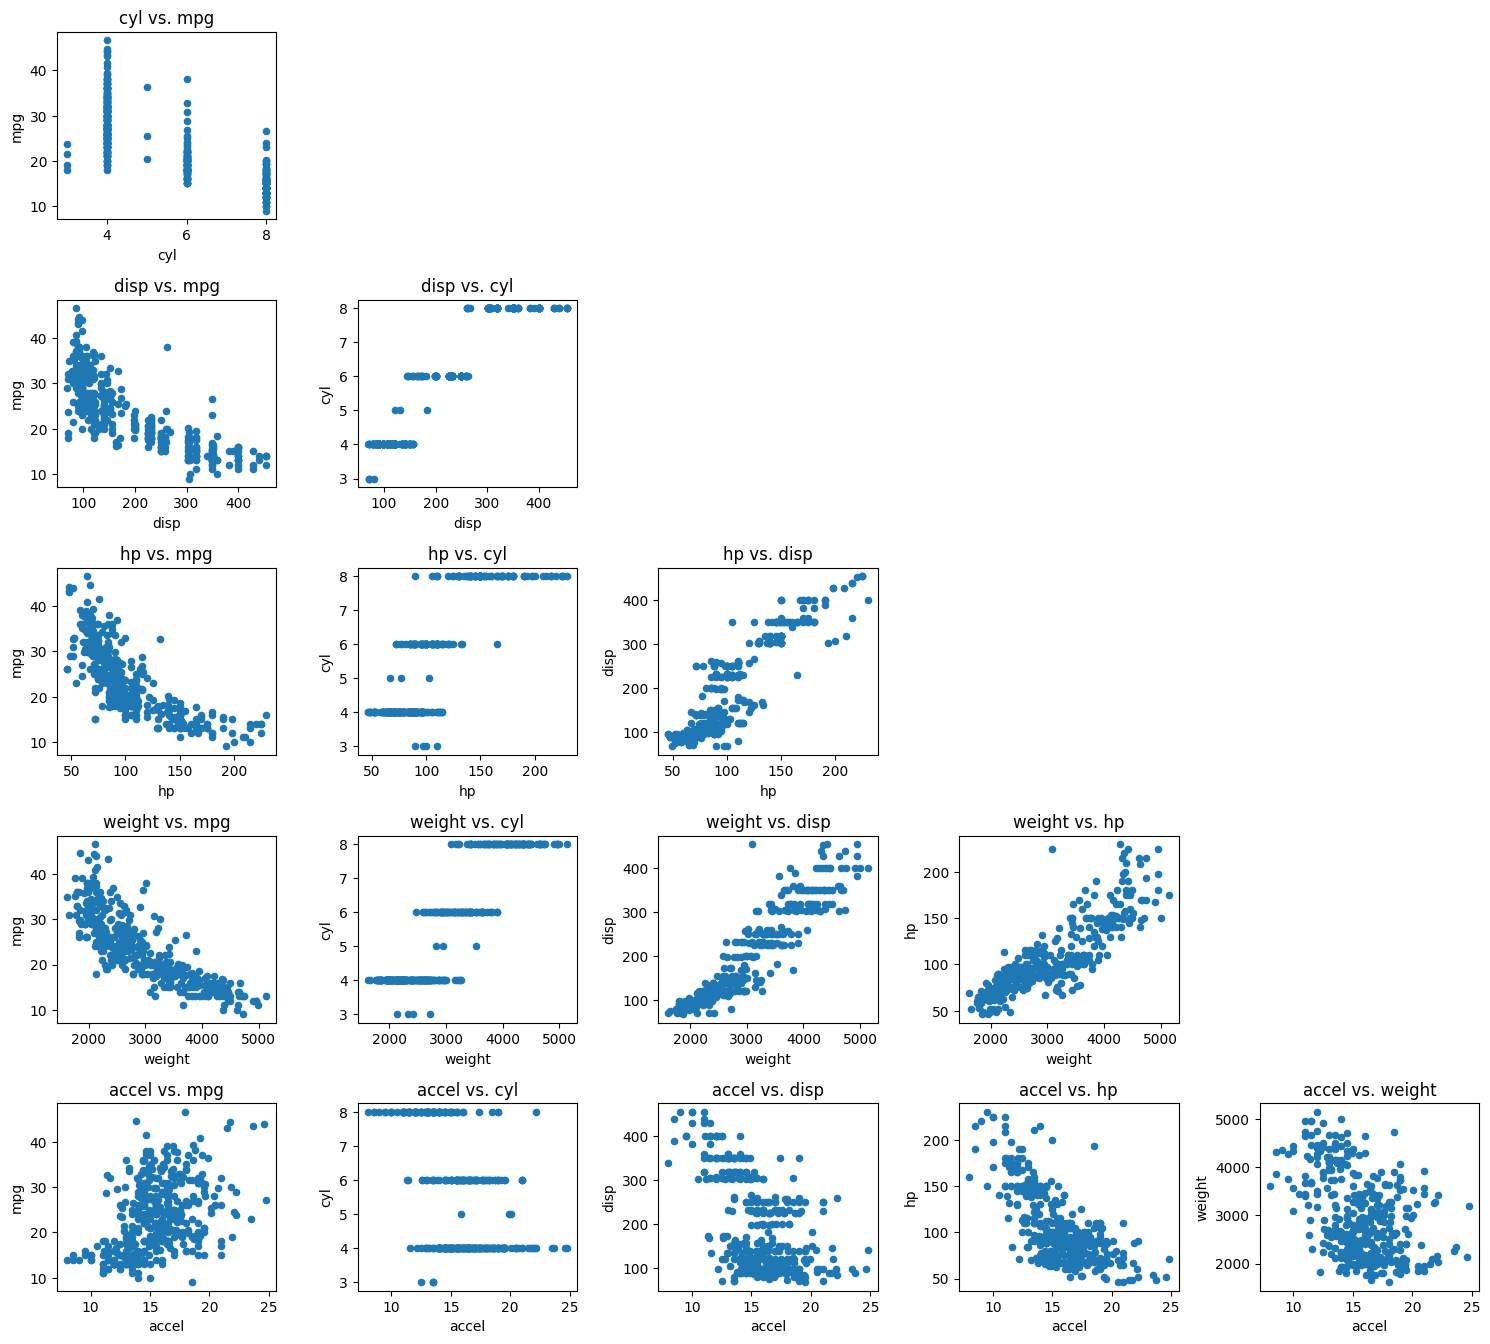

In [ ]:
plot_corr_grid(df, variables=list(df.columns[:-1]))

In [ ]:
np.random.seed(55)

train_idxs = np.random.choice(df.shape[0], int(0.8*df.shape[0]))
train_idxs[:5]

array([154, 295, 381,  29, 311])

In [ ]:
validation_idxs = [i for i in range(df.shape[0]) if i not in train_idxs]
validation_idxs[:5]

[0, 4, 6, 7, 8]

In [ ]:
X_train = df.iloc[train_idxs, :].drop(columns=['name', 'mpg'])
Y_train = np.reshape(np.array(df.loc[train_idxs, 'mpg']), (-1, 1))

In [ ]:
X_train.head()

,cyl,disp,hp,weight,accel,my
154,8,400.0,170,4668,11.5,75
295,5,183.0,77,3530,20.1,79
381,6,262.0,85,3015,17.0,82
29,4,97.0,88,2130,14.5,71
311,4,151.0,90,2678,16.5,80


In [ ]:
Y_train[:5]

array([[16. ],
       [25.4],
       [38. ],
       [27. ],
       [28. ]])

In [ ]:
lin_model = OLS()

car_model = lin_model.fit(X_train, Y_train)

In [ ]:
print('R2', car_model.score(X_train, Y_train))
print('model coefficients', car_model.coef_)
print('intercept', car_model.intercept_)

R2 0.8238605399666834
model coefficients [[-0.58077537  0.0090782   0.02015659 -0.00736672  0.02377262  0.8024231 ]]
intercept [-16.35398564]


In [ ]:
MSE = mse(Y_train, car_model.predict(X_train))  #, squared=False)
RMSE = MSE ** 0.5
RMSE

3.1914482901753436

In [ ]:
predict = car_model.predict(X_train)
predict[:5]

array([[12.12498469],
       [21.82024205],
       [28.24533153],
       [25.60290991],
       [29.36583698]])

<Axes: >

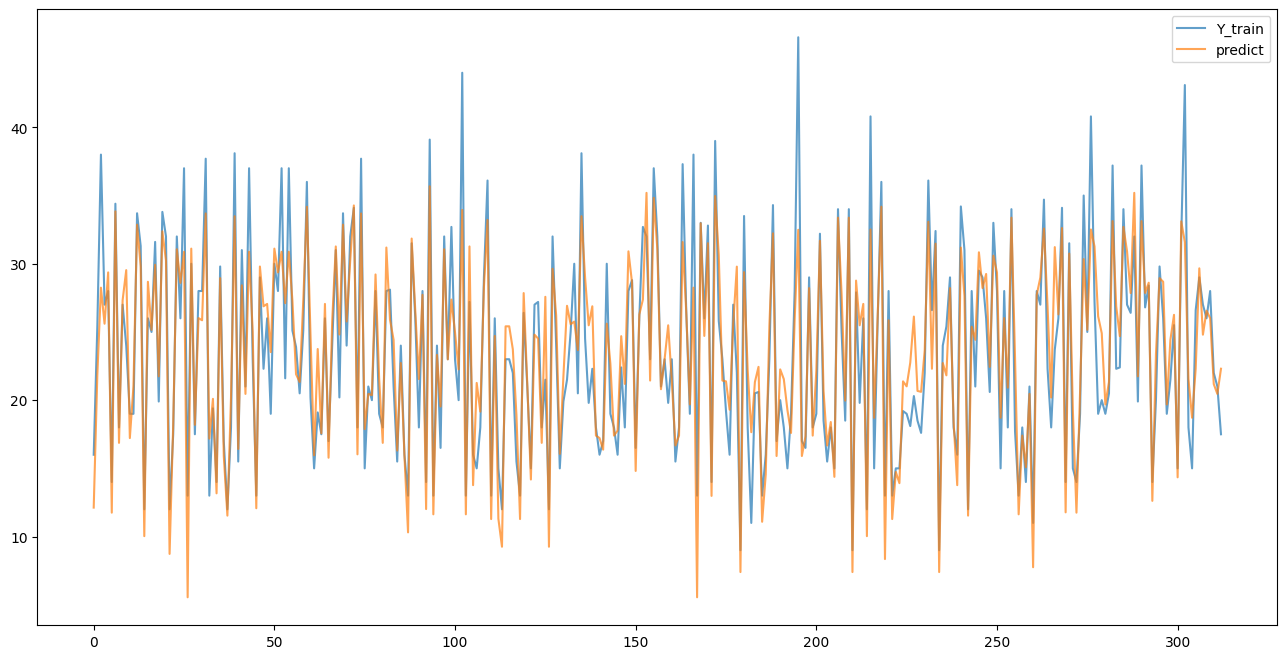

In [ ]:

result = pd.concat([pd.DataFrame(Y_train, columns=['Y_train']), pd.DataFrame(predict, columns=['predict'])], axis=1)
result.plot(figsize=(16, 8), alpha=0.7)

#### Задание 3.001

1. Вывести график зависимости правильных ответов Y от предсказанных ответов predict для обученной модели на основе датасета автомобилей (data/part3/chapter9/auto-mpg.data.csv).

2. Посчитать и вывести степень корреляции между правильными ответами Y и предсказанными ответами predict

3. Используя метод предсказания модели, вывести расход топлива (дальность) mpg для трёх новых автомобилей, которых не было ранее в датасете. Параметры автомобилей можно выдумать самостоятельно или найти в интернете.

#### Оценка модели на валидационной выборке

In [ ]:
X_valid = df.iloc[validation_idxs, :].drop(columns=['name', 'mpg'])
Y_valid = np.reshape(np.array(df.loc[validation_idxs, 'mpg']), (-1, 1))

In [ ]:
X_valid.head()

,cyl,disp,hp,weight,accel,my
0,8,307.0,130,3504,12.0,70
4,8,302.0,140,3449,10.5,70
6,8,454.0,220,4354,9.0,70
7,8,440.0,215,4312,8.5,70
8,8,455.0,225,4425,10.0,70


In [ ]:
Y_valid[:5]

array([[18.],
       [17.],
       [14.],
       [14.],
       [14.]])

In [ ]:
MSE = mse(Y_valid, car_model.predict(X_valid))  #, squared=False)
RMSE = MSE ** 0.5
RMSE

3.637599650177239

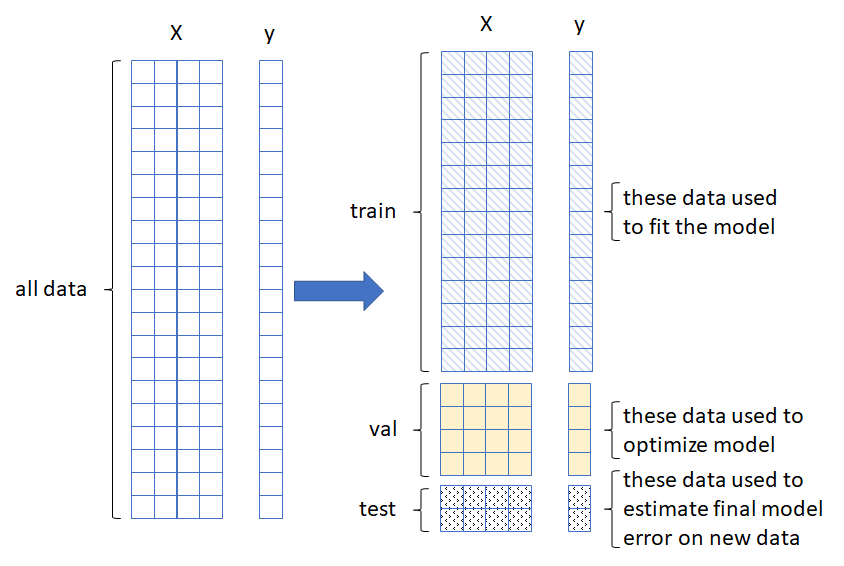

#### Задание 3.002

***Сведения о датасете Iris***

Набор данных Iris использовался в классической статье Р. А. Фишера 1936 года «Использование множественных измерений в таксономических проблемах».

Он включает три вида ирисов с 50 образцами каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом наборе данных:
- Id
- Длина чашелистика, см
- Ширина чашелистика, см
- Длина лепестка, см
- Ширина лепестка, см
- Вид

***Задание***

1. Загрузите датасет который встроен в библиотеку sklearn следующим образом:
```python
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df
```
---
2. Постройте графики пар зависимостей переменных дру от друга с помощью matplotlib и seaborn.pairplot следующим образом:
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue='species')
plt.show()

Необязательно: выведите дополнительную визуализацию для лучшего понимания данных.
```
---
3. Разделите датасет на две части: обучающую и тестовую выборку с помощью метода train_test_split библиотеки sklearn.model_selection. 

Пример:
```python
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=555)
```
---
4. Создайте линейно-ререссионную модель для предсказания вида Ириса по длине и ширине чашелистика и лепестка
---
5. Оцените точность полученной модели с помощью различных метрик.
---
6. Создайте набор данных для трёх разных цветков Ириса чтобы они точно попадали в три разные виды Ириса, при этом не используйте модель. После чего с помощью модели проверьте насколько точно она предсказывает вид каждого из этих трёх цветков.

#### Пример создания обучающей, валидационной и тестовой выборки

In [ ]:
df = pd.read_csv('../../data/part3/chapter9/austin_weather.csv')

<details>
  <summary>Расшифровка столбцов датасета `austin_weather.csv`...</summary>

1. **Date**  
   Дата записи данных (например, `YYYY-MM-DD`).

2. **TempHighF**  
   Максимальная дневная температура в градусах Фаренгейта (°F).

3. **TempAvgF**  
   Средняя дневная температура (°F).

4. **TempLowF**  
   Минимальная дневная температура (°F).

5. **DewPointHighF**, **DewPointAvgF**, **DewPointLowF**  
   Максимальная, средняя и минимальная **точка росы** за день (°F).  
   *Точка росы* — температура, при которой воздух насыщается водяным паром.

6. **HumidityHighPercent**, **HumidityAvgPercent**, **HumidityLowPercent**  
   Максимальная, средняя и минимальная **относительная влажность** за день (%).

7. **SeaLevelPressureHighInches**, **SeaLevelPressureAvgInches**, **SeaLevelPressureLowInches**  
   Максимальное, среднее и минимальное **атмосферное давление** на уровне моря (в дюймах ртутного столба, inHg).

8. **VisibilityHighMiles**, **VisibilityAvgMiles**, **VisibilityLowMiles**  
   Максимальная, средняя и минимальная **видимость** за день (в милях).

9. **WindHighMPH**  
   Максимальная скорость ветра за день (миль/час).

10. **WindAvgMPH**  
    Средняя скорость ветра за день (миль/час).

11. **WindGustMPH**  
    Максимальная скорость **порывов ветра** за день (миль/час).

12. **PrecipitationSumInches**  
    Сумма осадков за день (в дюймах).  
    *Например:* `0` — отсутствие дождя, `0.5` — полдюйма осадков.

13. **Events**  
    Погодные явления, зафиксированные за день. Могут включать:  
    `Rain`, `Thunderstorm`, `Snow`, `Fog` и т.д.  
    *Если явлений несколько, они перечисляются через запятую.*  
    *Пример:* `Rain, Thunderstorm`.

***Примечания***
- Данные представлены в единицах измерения, принятых в США (Фаренгейты, дюймы, мили).
- Давление (`SeaLevelPressure...`) измеряется в дюймах ртутного столба (inHg), а не в гектопаскалях (hPa).
- Для преобразования единиц в метрическую систему потребуются дополнительные вычисления.

</details>

In [ ]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [ ]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [ ]:
df['Events'].unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [ ]:
# df['Events'].replace(' ', None, inplace=True)
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,None
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,None
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,None
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,None
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,None
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,None
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,None


In [ ]:
df.drop(columns=['Date'], inplace=True)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,None
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,None
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,None
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,None
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,None
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,None
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,None


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(
    df.drop(columns=['Events']), 
    df['Events'],
    train_size=0.8, 
    test_size=0.1, 
    random_state=42
)

In [ ]:
train_val = list(train_X.index) + list(val_X.index)
train_val[:5]

[1090, 793, 351, 259, 855]

In [ ]:
testX = df.drop(columns=['Events']).drop(train_val, axis=0)
testY = df.iloc[testX.index]['Events']

In [ ]:
testX.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
13,58,43,28,37,22,18,75,49,22,30.48,30.35,30.14,10,10,10,14,4,21,0
14,71,57,42,55,48,38,89,68,47,30.12,29.95,29.81,10,10,8,16,7,28,0
20,72,65,57,64,61,54,93,81,68,29.97,29.87,29.75,10,8,1,13,6,21,0.1
21,75,62,48,54,37,20,93,53,13,30.16,30.06,29.87,10,9,5,12,3,19,0
34,40,33,26,22,17,10,81,60,39,30.76,30.63,30.4,10,9,3,16,5,24,0.05


In [ ]:
testY[:5]

13    None
14    None
20    Rain
21    None
34    None
Name: Events, dtype: object

In [ ]:
100 * len(train_X) / len(df), 100 * len(val_X) / len(df), 100 * len(testX) / len(df)

(79.98483699772555, 10.007581501137226, 10.007581501137226)

In [ ]:
df = pd.read_csv('../../data/part3/chapter9/spx.csv')
df

,date,close
0,02-Jan-86,209.59
1,03-Jan-86,210.88
2,06-Jan-86,210.65
3,07-Jan-86,213.80
4,08-Jan-86,207.97
...,...,...
8187,25-Jun-18,2717.07
8188,26-Jun-18,2723.06
8189,27-Jun-18,2699.63
8190,28-Jun-18,2716.31


In [ ]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_228803/3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.dtypes

date     datetime64[ns]
close           float64
dtype: object

<Axes: >

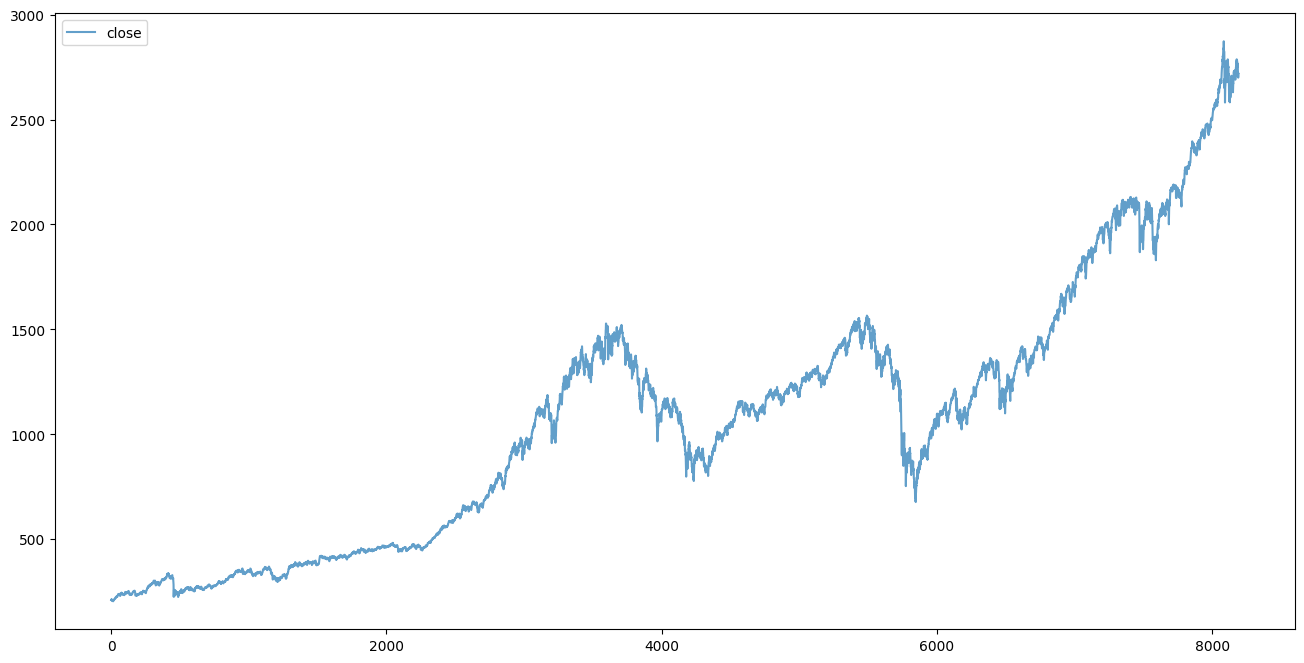

In [ ]:
df.plot(figsize=(16, 8), alpha=0.7)

In [ ]:
df.describe()

,close
count,8192.000000
mean,1070.897411
std,616.714534
min,203.490000
25%,458.632500
50%,1106.435000
75%,1388.132500
max,2872.870000


In [ ]:
train_data = df[(df['date'] < '2017-10-01') & (df['date'] > '2005-01-01')]
train_data

,date,close
4795,2005-01-03,1202.08
4796,2005-01-04,1188.05
4797,2005-01-05,1183.74
4798,2005-01-06,1187.89
4799,2005-01-07,1186.19
...,...,...
7999,2017-09-25,2496.66
8000,2017-09-26,2496.84
8001,2017-09-27,2507.04
8002,2017-09-28,2510.06


In [ ]:
val_data = df[(df['date'] >= '2017-10-01')]
val_data

,date,close
8004,2017-10-02,2529.12
8005,2017-10-03,2534.58
8006,2017-10-04,2537.74
8007,2017-10-05,2552.07
8008,2017-10-06,2549.33
...,...,...
8187,2018-06-25,2717.07
8188,2018-06-26,2723.06
8189,2018-06-27,2699.63
8190,2018-06-28,2716.31


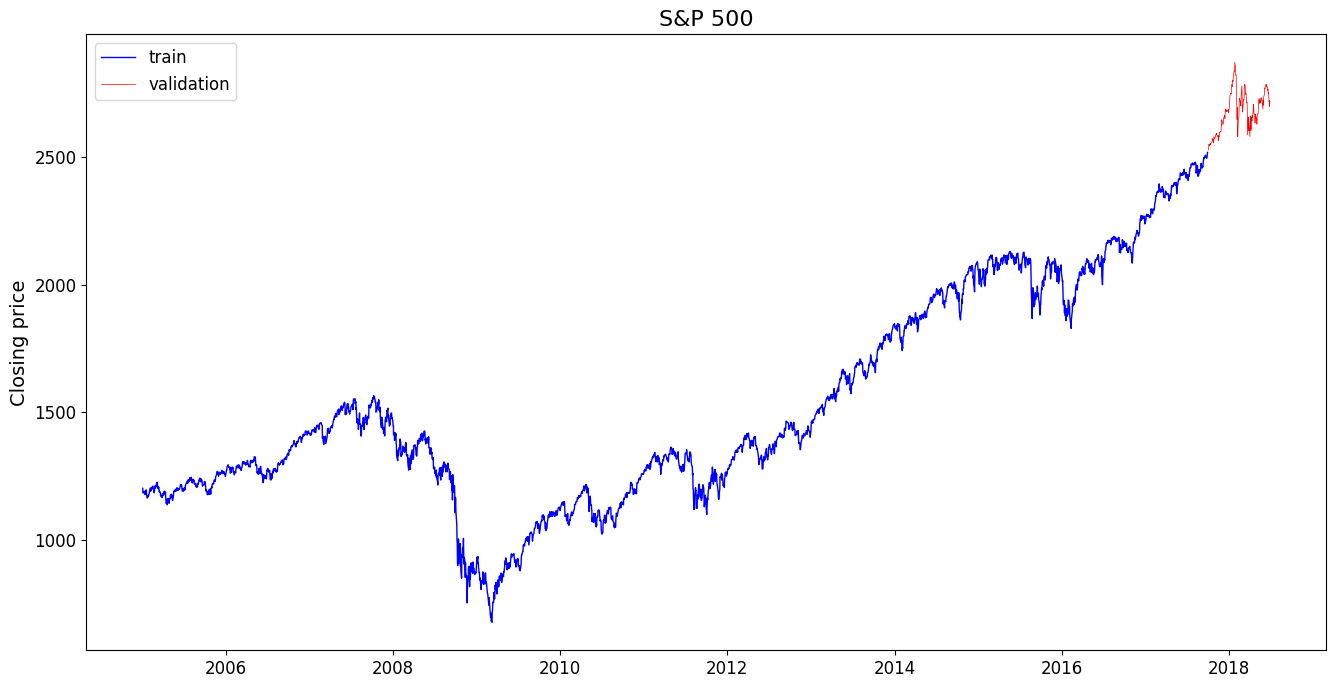

In [ ]:
fig, axes = plt.subplots(figsize=(16, 8))

axes.plot(
    train_data['date'], 
    train_data['close'], 
    color='blue',
    label='train',
    lw=1
)

axes.plot(
    val_data['date'], 
    val_data['close'], 
    color='red',
    label='validation',
    lw=0.5
)

axes.set_title('S&P 500', fontsize=16)
axes.set_ylabel('Closing price', fontsize=14)
axes.tick_params(labelsize=12)
axes.legend(fontsize=12)

plt.show()

### Понимание масштабирования и нормализации данных

In [ ]:
l = list(range(3, 10))
l

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
x = l[2]
x

5

In [ ]:
[(x - min(l)) / (max(l) - min(l)) for x in l]

[0.0,
 0.16666666666666666,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333334,
 1.0]

#### Обучение модели на исходных данных без нормализации

In [2]:
df = pd.read_csv('../../data/part3/chapter9/auto-mpg.data.csv')
df

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [3]:
df.describe()

,mpg,cyl,disp,hp,weight,accel,my
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
np.random.seed(55)

train_idxs = np.random.choice(df.shape[0], int(0.8*df.shape[0]))
train_idxs[:5]

array([154, 295, 381,  29, 311])

In [5]:
validation_idxs = [i for i in range(df.shape[0]) if i not in train_idxs]
validation_idxs[:5]

[0, 4, 6, 7, 8]

In [6]:
X_train = df.iloc[train_idxs, :].drop(columns=['name', 'mpg'])
Y_train = np.reshape(np.array(df.loc[train_idxs, 'mpg']), (-1, 1))

In [7]:
X_train.head()

,cyl,disp,hp,weight,accel,my
154,8,400.0,170,4668,11.5,75
295,5,183.0,77,3530,20.1,79
381,6,262.0,85,3015,17.0,82
29,4,97.0,88,2130,14.5,71
311,4,151.0,90,2678,16.5,80


In [8]:
Y_train[:5]

array([[16. ],
       [25.4],
       [38. ],
       [27. ],
       [28. ]])

In [9]:
lin_model = OLS()

car_model = lin_model.fit(X_train, Y_train)

In [10]:
print('R2', car_model.score(X_train, Y_train))
print('model coefficients', car_model.coef_)
print('intercept', car_model.intercept_)

R2 0.8238605399666834
model coefficients [[-0.58077537  0.0090782   0.02015659 -0.00736672  0.02377262  0.8024231 ]]
intercept [-16.35398564]


In [11]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'my', 'name'], dtype='object')

In [ ]:
# y = const + -0.58077537 * cyl + 0.0090782 * disp + ...
# y

#### Обучение модели на нормализованных данных

In [12]:
df

,mpg,cyl,disp,hp,weight,accel,my,name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
data = df.loc[:, :'my']
data.head()

,mpg,cyl,disp,hp,weight,accel,my
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [15]:
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled[:5]

array([[0.2393617 , 1.        , 0.61757106, 0.45652174, 0.5361497 ,
        0.23809524, 0.        ],
       [0.15957447, 1.        , 0.72868217, 0.64673913, 0.58973632,
        0.20833333, 0.        ],
       [0.2393617 , 1.        , 0.64599483, 0.56521739, 0.51686986,
        0.17857143, 0.        ],
       [0.18617021, 1.        , 0.60981912, 0.56521739, 0.51601928,
        0.23809524, 0.        ],
       [0.21276596, 1.        , 0.60465116, 0.51086957, 0.52055571,
        0.14880952, 0.        ]])

In [16]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,mpg,cyl,disp,hp,weight,accel,my
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0


In [17]:
data_scaled.describe()

,mpg,cyl,disp,hp,weight,accel,my
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
np.random.seed(55)

train_idxs = np.random.choice(data_scaled.shape[0], int(0.8*data_scaled.shape[0]))
train_idxs[:5]

array([154, 295, 381,  29, 311])

In [19]:
validation_idxs = [i for i in range(data_scaled.shape[0]) if i not in train_idxs]
validation_idxs[:5]

[0, 4, 6, 7, 8]

In [20]:
X_train = data_scaled.iloc[train_idxs, :].drop(columns=['mpg'])
Y_train = np.reshape(np.array(data_scaled.loc[train_idxs, 'mpg']), (-1, 1))

In [21]:
X_train.head()

,cyl,disp,hp,weight,accel,my
154,1.0,0.857881,0.673913,0.866175,0.208333,0.416667
295,0.4,0.297158,0.168478,0.543521,0.720238,0.750000
381,0.6,0.501292,0.211957,0.397505,0.535714,1.000000
29,0.2,0.074935,0.228261,0.146583,0.386905,0.083333
311,0.2,0.214470,0.239130,0.301956,0.505952,0.833333


In [22]:
lin_model = OLS()

car_model = lin_model.fit(X_train, Y_train)

R2 0.8238605399666834
model coefficients [[-0.58077537  0.0090782   0.02015659 -0.00736672  0.02377262  0.8024231 ]]
intercept [-16.35398564]

In [23]:
print('R2', car_model.score(X_train, Y_train))
print('model coefficients', car_model.coef_)
print('intercept', car_model.intercept_)

R2 0.8238605399666834
model coefficients [[-0.07723077  0.09343784  0.09863863 -0.69102175  0.01062181  0.25609248]]
intercept [0.50333748]


In [24]:
scaler.data_range_

array([  37.6,    5. ,  387. ,  184. , 3527. ,   16.8,   12. ])

In [25]:
scaler.data_min_

array([   9.,    3.,   68.,   46., 1613.,    8.,   70.])

In [28]:
Y = scaler.inverse_transform(data_scaled.iloc[0:1, :])
Y = pd.DataFrame(Y)
Y

,0,1,2,3,4,5,6
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0


![Screenshot from 2025-02-12 12-18-14.png](<attachment:Screenshot from 2025-02-12 12-18-14.png>)
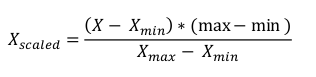

- max, min - экстремумы исходных данных
- Xmax, Xmin - экстремумы результирующих данных (в нашем случае 0..1)
- X - преобразуемое число
- Xscaled - масштабированное значение

#### Пример активационной функции модели на основе нейросети

![Screenshot from 2025-02-12 12-22-52.png](<attachment:Screenshot from 2025-02-12 12-22-52.png>)
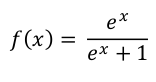

![Screenshot from 2025-02-12 12-24-33.png](<attachment:Screenshot from 2025-02-12 12-24-33.png>)
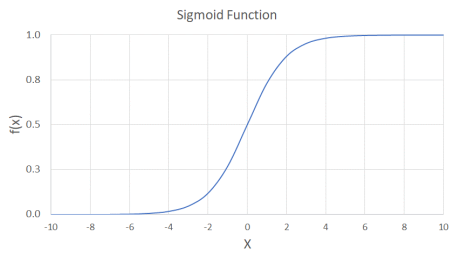

In [18]:
df = pd.read_csv('../../data/part3/chapter9/distributions.csv')
df

,values_1,values_2,values_3
0,3.996714,6.298711,0.124109
1,3.361736,5.349267,2.777407
2,4.147689,3.619261,-0.462100
3,5.023030,2.206126,1.960192
4,3.265847,4.896447,-5.968073
...,...,...,...
995,3.218900,5.640300,3.887403
996,5.297687,3.446957,4.788763
997,4.140843,1.736251,-2.708803
998,2.928821,3.173866,5.170882


In [19]:
df.describe()

,values_1,values_2,values_3
count,1000.000000,1000.000000,1000.000000
mean,3.519332,3.641672,3.529171
std,0.979216,1.994909,4.917271
min,0.258733,-2.380777,-11.597561
25%,2.852410,2.287517,0.260002
50%,3.525301,3.626154,3.498746
75%,4.147944,4.957764,6.804577
max,7.352731,9.886215,23.131189


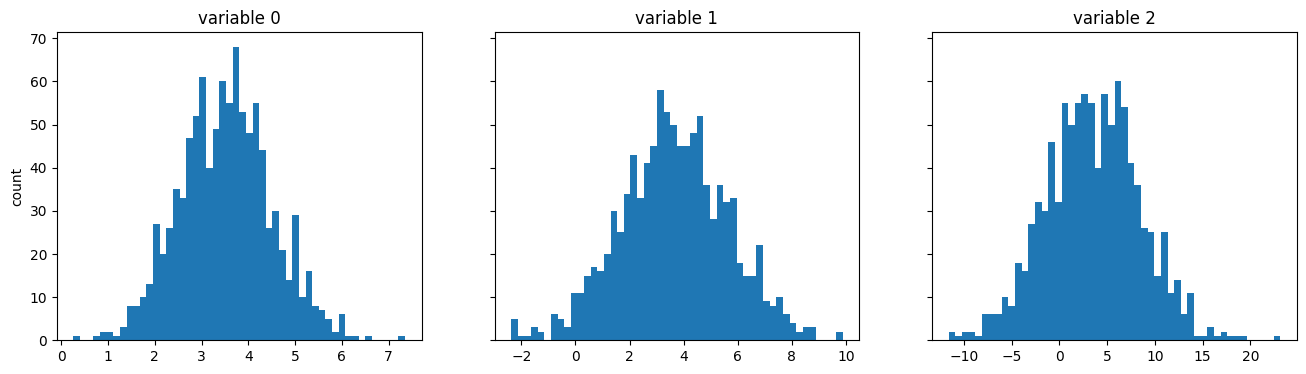

In [20]:
fig, ax = plt.subplots(1, df.shape[1], sharey=True, figsize=(16, 4))

for i in range(df.shape[1]):
    _ = ax[i].hist(df.iloc[:, i], bins=50)
    _ = ax[i].set_title('variable ' + str(i))

_ = ax[0].set_ylabel('count')

plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

colnames = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns=colnames)

df

,values_1,values_2,values_3
0,0.487759,1.332576,-0.692816
1,-0.161022,0.856405,-0.152959
2,0.642015,-0.011240,-0.812090
3,1.536382,-0.719965,-0.319235
4,-0.258995,0.629303,-1.932372
...,...,...,...
995,-0.306963,1.002366,0.072888
996,1.817009,-0.097655,0.256285
997,0.635020,-0.955620,-1.269219
998,-0.603347,-0.234617,0.334033


In [22]:
df.describe()

,values_1,values_2,values_3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.531308e-16,-7.638334e-17,9.414691e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.331472e+00,-3.020420e+00,-3.077784e+00
25%,-6.814187e-01,-6.791456e-01,-6.651667e-01
50%,6.098290e-03,-7.782799e-03,-6.190450e-03
75%,6.422755e-01,6.600555e-01,6.664355e-01
max,3.916723e+00,3.131806e+00,3.988355e+00


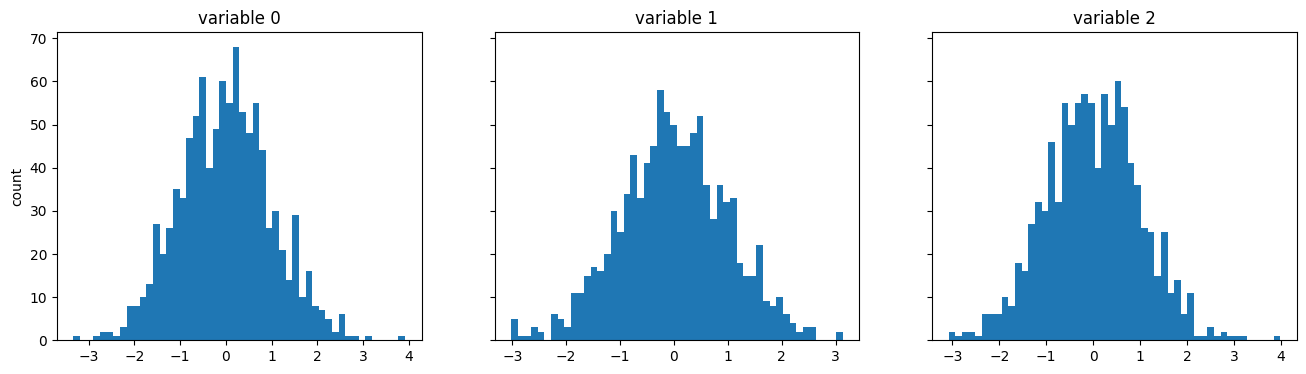

In [23]:
fig, ax = plt.subplots(1, df.shape[1], sharey=True, figsize=(16, 4))

for i in range(df.shape[1]):
    _ = ax[i].hist(df.iloc[:, i], bins=50)
    _ = ax[i].set_title('variable ' + str(i))

_ = ax[0].set_ylabel('count')

plt.show()

#### Обратное преобразование данных к исходным единицам

![Screenshot from 2025-02-13 12-05-08.png](<attachment:Screenshot from 2025-02-13 12-05-08.png>)
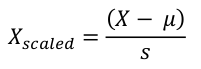

In [26]:
X = scaler.inverse_transform(df)
X = pd.DataFrame(X, columns=colnames)
X

,values_1,values_2,values_3
0,3.996714,6.298711,0.124109
1,3.361736,5.349267,2.777407
2,4.147689,3.619261,-0.462100
3,5.023030,2.206126,1.960192
4,3.265847,4.896447,-5.968073
...,...,...,...
995,3.218900,5.640300,3.887403
996,5.297687,3.446957,4.788763
997,4.140843,1.736251,-2.708803
998,2.928821,3.173866,5.170882


### Упражнение 9.02

In [59]:
df = pd.read_csv('../../data/part3/chapter9/austin_weather.csv')
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [60]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [61]:
df['Events'].unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [62]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [63]:
df.drop(columns=['Date'], inplace=True)
# df['Events'] = ['None' if df['Events'][i] is ' ' else df['Events'][i] for i in range(df.shape[0])]
df['Events'] = df['Events'].apply(lambda x: np.nan if x == ' ' else x)
# df['Events'].replace(' ', 'None', inplace=True)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,NaN
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,NaN
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,NaN
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,NaN
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,NaN
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,NaN
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,NaN


In [64]:
df['Events'].unique()

array(['Rain , Thunderstorm', nan, 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [65]:
df.replace('-', np.nan, inplace=True)

In [66]:
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,NaN
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,NaN
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,NaN
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,NaN
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,NaN
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,NaN
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,NaN


In [67]:
df['DewPointLowF'].unique()

array(['43', '28', '23', '21', '36', '33', '37', '30', '19', '18', '38',
       '15', '2', '4', '50', '54', '20', '17', '16', '24', '10', '22',
       '5', '7', '9', '51', '41', '27', '39', '13', '29', '53', '32',
       '59', '44', '47', '35', '48', '12', '26', '31', '45', '52', '56',
       '49', '62', '63', '66', '60', '61', '55', '57', '25', '67', '58',
       '65', '68', '69', '64', nan, '70', '71', '46', '40', '34', '14',
       '42', '8', '72', '73', '75', '6', '11'], dtype=object)

In [68]:
df.dropna(inplace=True)

In [69]:
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
18,53,47,40,51,45,30,93,75,57,30.33,30.2,30.12,10,2,1,12,1,18,0.16,Rain
19,70,62,53,60,55,50,93,80,66,30.18,30.11,30,10,4,0,12,3,19,0,Fog
20,72,65,57,64,61,54,93,81,68,29.97,29.87,29.75,10,8,1,13,6,21,0.1,Rain
22,67,57,46,58,47,33,84,68,52,30.12,30.01,29.9,10,10,10,15,4,24,0.01,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,100,88,75,71,67,62,87,59,31,30.09,30.02,29.94,10,10,10,9,3,17,0,Thunderstorm
1302,103,87,71,73,70,63,100,65,29,30.07,30.01,29.94,10,9,2,23,3,35,0.16,"Rain , Thunderstorm"
1304,98,88,77,75,71,66,88,63,38,29.94,29.9,29.84,10,10,10,16,3,23,T,"Rain , Thunderstorm"
1310,103,90,77,74,71,66,85,58,31,29.93,29.88,29.82,10,10,2,13,4,24,0.04,"Rain , Thunderstorm"


In [73]:
df['PrecipitationSumInches'].replace('T', np.nan, inplace=True)

/tmp/ipykernel_3722/646081595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PrecipitationSumInches'].replace('T', np.nan, inplace=True)


In [ ]:
df.dropna(inplace=True)

In [75]:
df.loc[:, :'PrecipitationSumInches']

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
18,53,47,40,51,45,30,93,75,57,30.33,30.2,30.12,10,2,1,12,1,18,0.16
19,70,62,53,60,55,50,93,80,66,30.18,30.11,30,10,4,0,12,3,19,0
20,72,65,57,64,61,54,93,81,68,29.97,29.87,29.75,10,8,1,13,6,21,0.1
22,67,57,46,58,47,33,84,68,52,30.12,30.01,29.9,10,10,10,15,4,24,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,99,87,75,74,71,65,88,61,33,30.13,30.05,29.98,10,10,10,15,3,27,0.02
1295,100,88,75,71,67,62,87,59,31,30.09,30.02,29.94,10,10,10,9,3,17,0
1302,103,87,71,73,70,63,100,65,29,30.07,30.01,29.94,10,9,2,23,3,35,0.16
1310,103,90,77,74,71,66,85,58,31,29.93,29.88,29.82,10,10,2,13,4,24,0.04


In [78]:
df_temp = df.loc[:, :'PrecipitationSumInches'].astype('float64')

In [79]:
df_temp.dtypes

TempHighF                     float64
TempAvgF                      float64
TempLowF                      float64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
dtype: object

In [80]:
df = pd.concat([df_temp, df['Events']], axis=1)

In [81]:
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74.0,60.0,45.0,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
18,53.0,47.0,40.0,51.0,45.0,30.0,93.0,75.0,57.0,30.33,30.20,30.12,10.0,2.0,1.0,12.0,1.0,18.0,0.16,Rain
19,70.0,62.0,53.0,60.0,55.0,50.0,93.0,80.0,66.0,30.18,30.11,30.00,10.0,4.0,0.0,12.0,3.0,19.0,0.00,Fog
20,72.0,65.0,57.0,64.0,61.0,54.0,93.0,81.0,68.0,29.97,29.87,29.75,10.0,8.0,1.0,13.0,6.0,21.0,0.10,Rain
22,67.0,57.0,46.0,58.0,47.0,33.0,84.0,68.0,52.0,30.12,30.01,29.90,10.0,10.0,10.0,15.0,4.0,24.0,0.01,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,99.0,87.0,75.0,74.0,71.0,65.0,88.0,61.0,33.0,30.13,30.05,29.98,10.0,10.0,10.0,15.0,3.0,27.0,0.02,"Rain , Thunderstorm"
1295,100.0,88.0,75.0,71.0,67.0,62.0,87.0,59.0,31.0,30.09,30.02,29.94,10.0,10.0,10.0,9.0,3.0,17.0,0.00,Thunderstorm
1302,103.0,87.0,71.0,73.0,70.0,63.0,100.0,65.0,29.0,30.07,30.01,29.94,10.0,9.0,2.0,23.0,3.0,35.0,0.16,"Rain , Thunderstorm"
1310,103.0,90.0,77.0,74.0,71.0,66.0,85.0,58.0,31.0,29.93,29.88,29.82,10.0,10.0,2.0,13.0,4.0,24.0,0.04,"Rain , Thunderstorm"


In [82]:
df.dtypes

TempHighF                     float64
TempAvgF                      float64
TempLowF                      float64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

<Axes: >

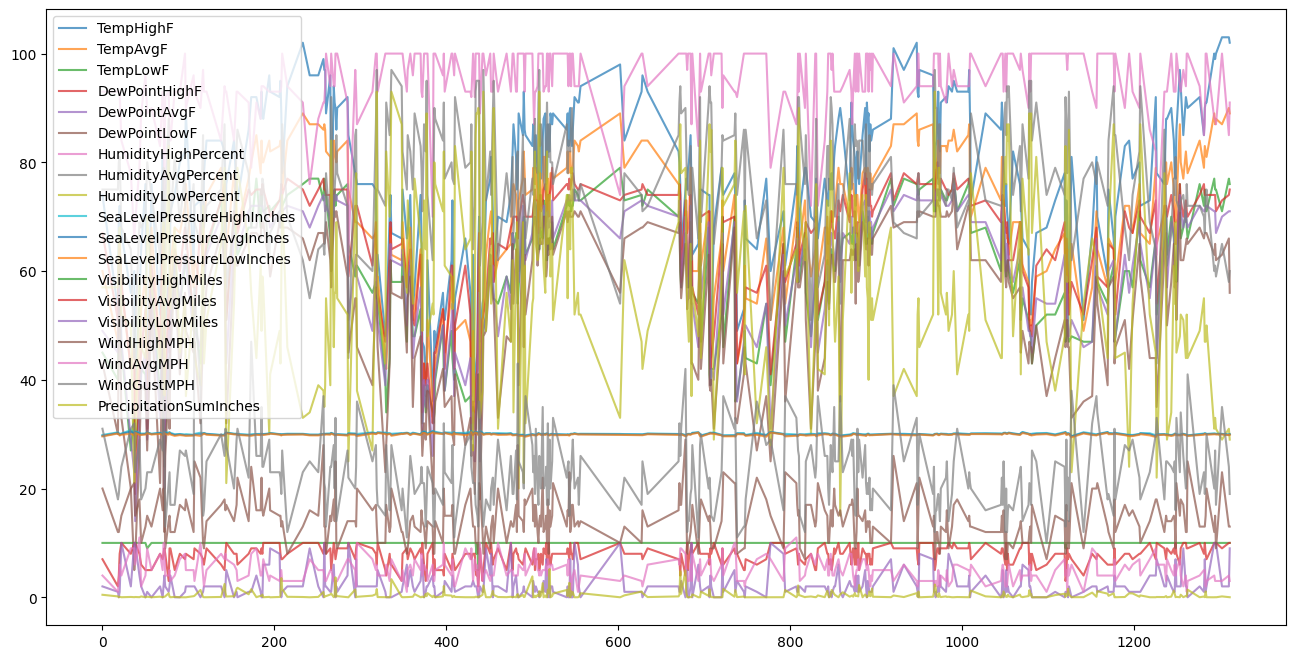

In [84]:
df.plot(figsize=(16, 8), alpha=0.7)

In [91]:
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (16, 14))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        if len(np.unique(df[var_name])) <= bins:
            use_bins = len(np.unique(df[var_name]))
        else:
            use_bins = bins
        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

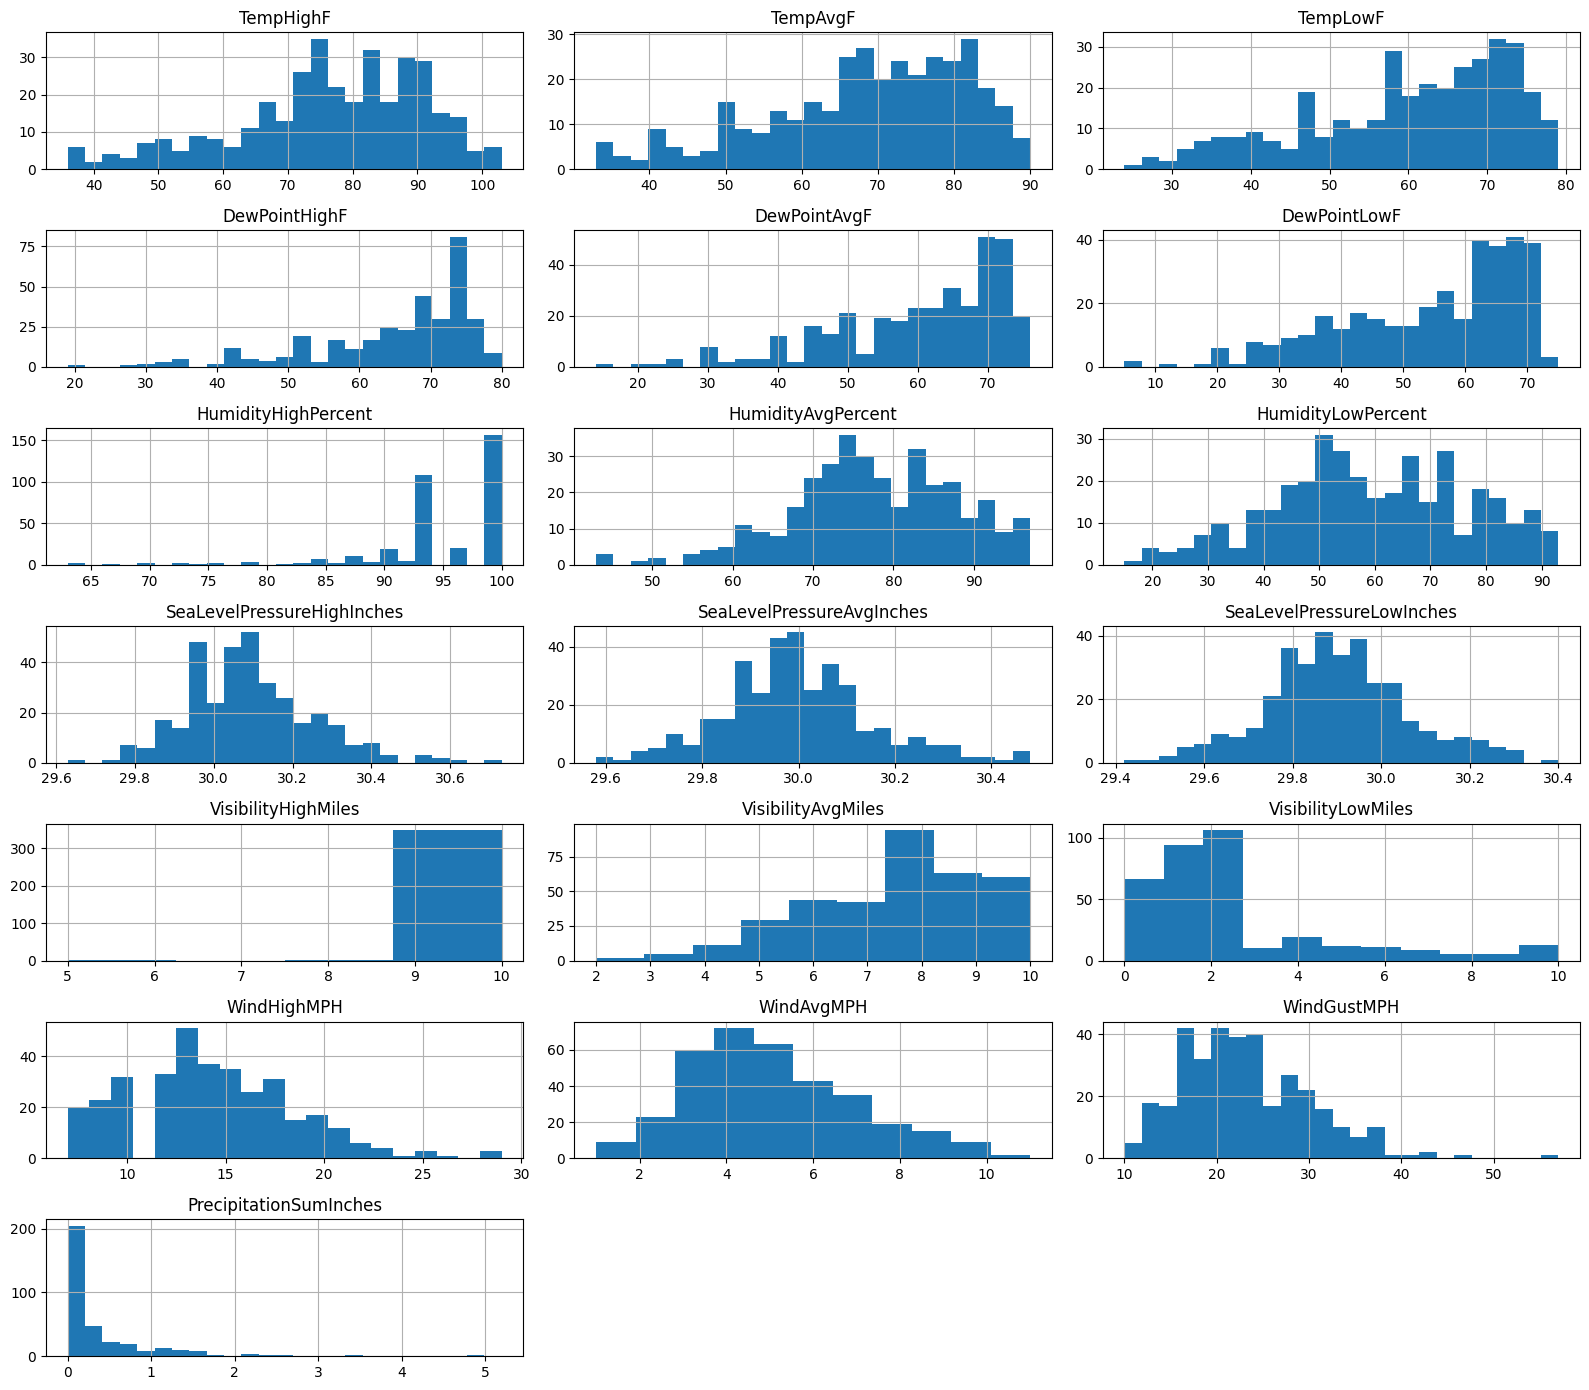

In [93]:
plot_histogram_grid(df, variables=list(df.columns[:-1]), n_rows=7, n_cols=3, bins=25)

In [94]:
train_X, val_X, train_y, val_y = train_test_split(df.drop(columns=['Events']), df['Events'], train_size=0.8, test_size=0.1, random_state=55555)

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
scaler.fit(train_X)

scaled_train = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
scaled_val = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)

scaled_train.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,-0.230593,-0.477253,-0.691103,0.062501,-0.113589,-0.300847,0.796277,0.900502,0.765942,1.010077,0.098841,-0.373128,0.097055,-1.996072,-0.537256,0.627090,0.037699,0.871923,0.246340
1,-0.029661,0.041270,0.080771,0.590147,-0.113589,-0.577942,-1.246322,-1.411830,-1.250778,-0.314762,-1.271882,-1.561776,0.097055,1.301274,-0.122844,1.361756,2.436718,1.897100,-0.488041
2,-1.570138,-1.292075,-0.922666,-1.256614,-1.321375,-1.339955,0.167785,-0.255664,-0.328849,1.136253,0.947384,0.940640,0.097055,0.202159,-0.122844,0.137313,-0.442105,-0.153253,-0.473918
3,0.841043,0.930167,0.929833,0.941911,0.933158,1.084631,-0.146461,-0.255664,-0.213608,-0.504025,-0.358066,-0.185447,0.097055,0.202159,-0.537256,-0.352465,0.037699,-0.299707,-0.149096
4,-1.369206,-1.218000,-0.999853,-1.168673,-0.999299,-0.577942,0.796277,1.478585,1.515010,0.253026,0.621021,0.565278,0.097055,0.202159,-0.122844,-1.332019,-0.442105,-1.324884,0.105113


In [100]:
scaled_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TempHighF,280.0,4.758099e-16,1.001791,-2.708751,-0.632457,0.104293,0.774066,1.778724
TempAvgF,280.0,5.202188e-16,1.001791,-2.625420,-0.625402,0.189420,0.782018,1.596840
TempLowF,280.0,-3.806479e-17,1.001791,-2.543602,-0.691103,0.235146,0.852646,1.470145
DewPointHighF,280.0,2.537653e-16,1.001791,-4.070725,-0.553086,0.326324,0.766029,1.293675
DewPointAvgF,280.0,4.440892e-17,1.001791,-3.736947,-0.757742,0.289006,0.852639,1.255234
DewPointLowF,280.0,7.930164e-17,1.001791,-3.418171,-0.733808,0.322618,0.807535,1.431000
HumidityHighPercent,280.0,-1.065814e-15,1.001791,-5.017274,-0.303584,-0.146461,0.796277,0.796277
HumidityAvgPercent,280.0,3.933362e-16,1.001791,-3.338773,-0.544706,-0.062970,0.707807,1.863973
HumidityLowPercent,280.0,1.015061e-16,1.001791,-2.287949,-0.688978,-0.040746,0.780347,1.918354
SeaLevelPressureHighInches,280.0,7.216450e-16,1.001791,-2.901353,-0.693288,-0.125499,0.631552,4.038282


1. Создать модель пронозирующая поодные явления.
2. Оценить точность
3. Предсказать пооду для тестовой выборки (10%) - результат должен быть таким же как в исходном столбце Events

### Задание 9.1 - Разбиение, масштабирование и моделирование данных

### Резюме

## 10 Моделирование данных - основы моделирования

### Введение в моделирование данных

### Изучение основ моделирования

### Прогнозирование будущих значений временных рядов

### Задание 10.1 - Нормализация и сглаживание данных

### Резюме

## 11 Моделирование данных - Регрессионное моделирование

### Введение в регрессионное моделирование

### Изучение регрессионного моделирования

### Диагностика модели

### Задание 11.1 - Множественная регрессия с нелинейными моделями

### Резюме